In [108]:
%matplotlib inline
import bluepyopt as bpop
import epileptor_evaluator
import epileptor_util
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
# import run_fit

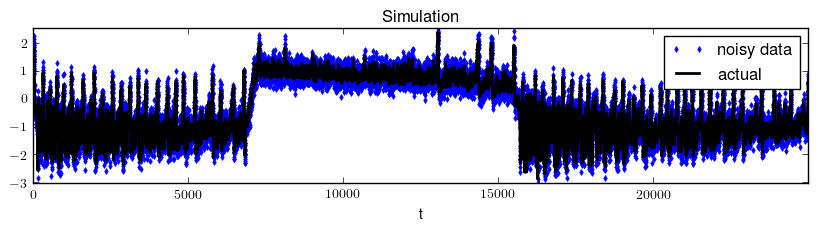

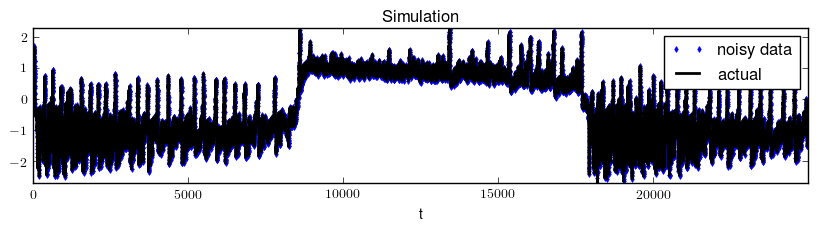

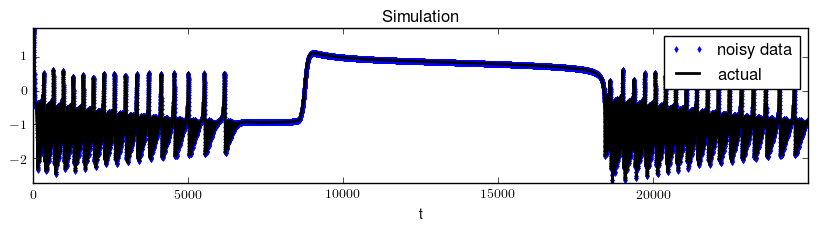

In [173]:
evaluator = 0.
if 1:
    epileptor_evaluator = reload(epileptor_evaluator)
    epileptor_util = reload(epileptor_util)
evaluator = epileptor_evaluator.Epileptor_Evaluator(plot=True, total_time=2500, dt_sample=.1)

In [165]:
opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=3,                                                                                                                                            
                                          eta=20, mutpb=0.3, cxpb=0.7)

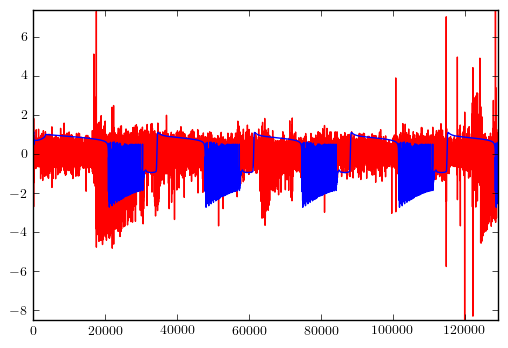

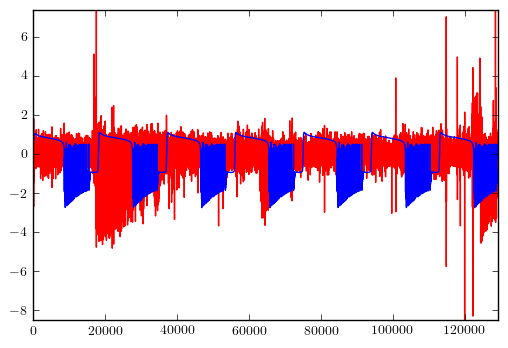

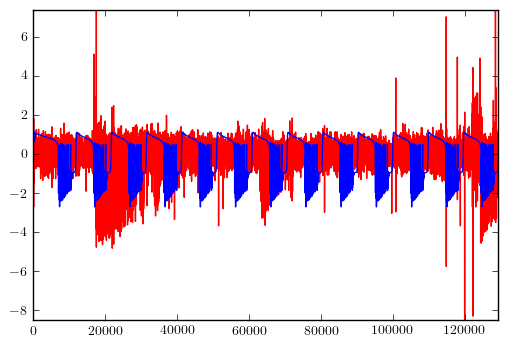

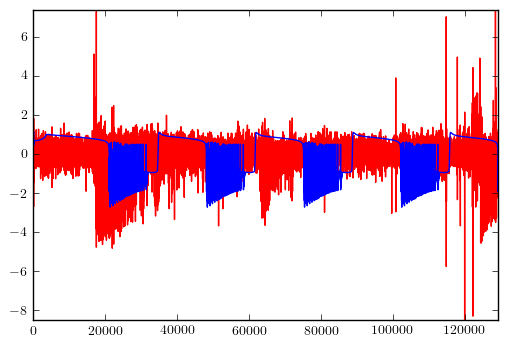

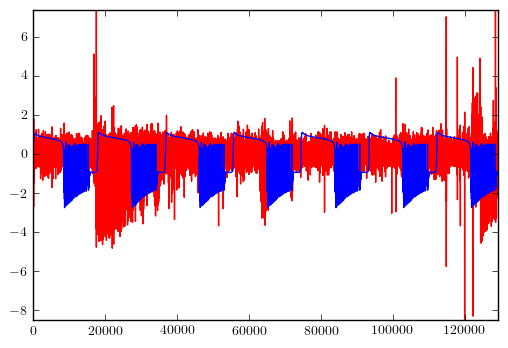

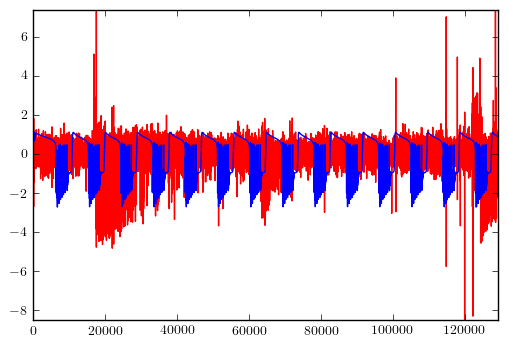

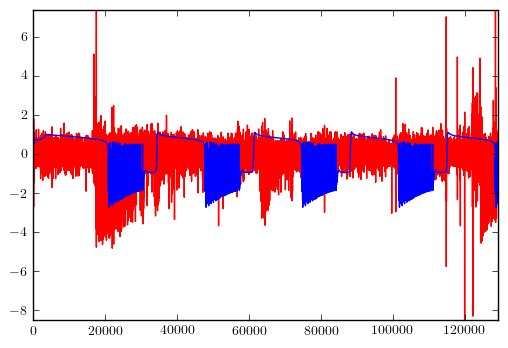

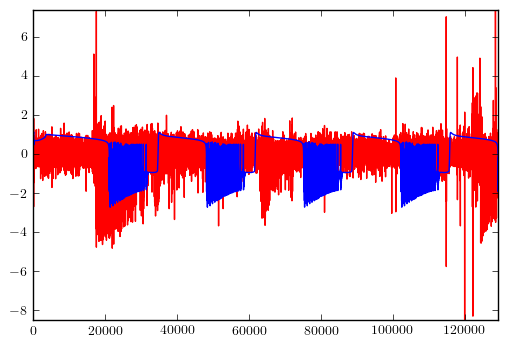

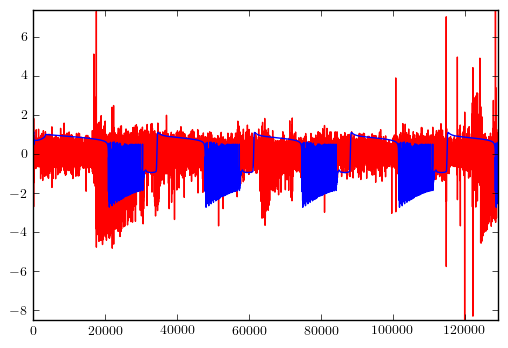

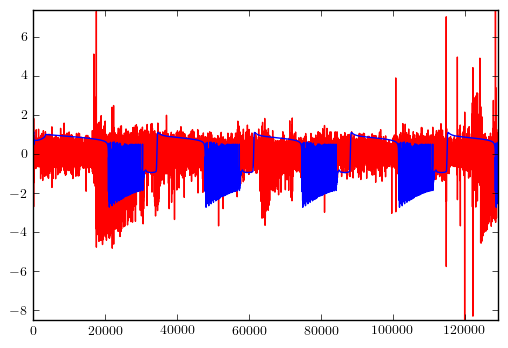

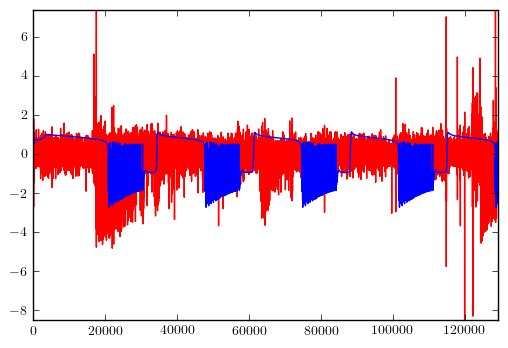

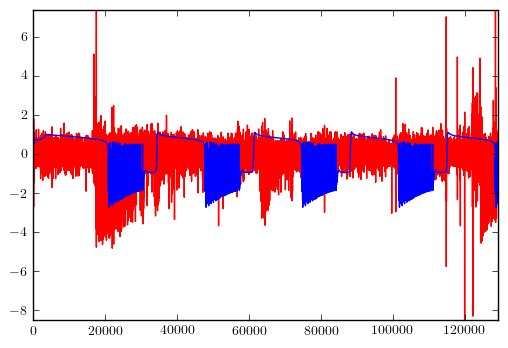

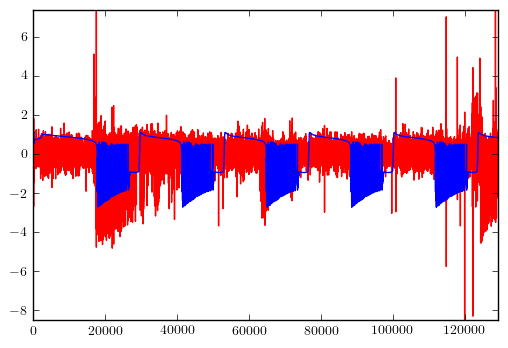

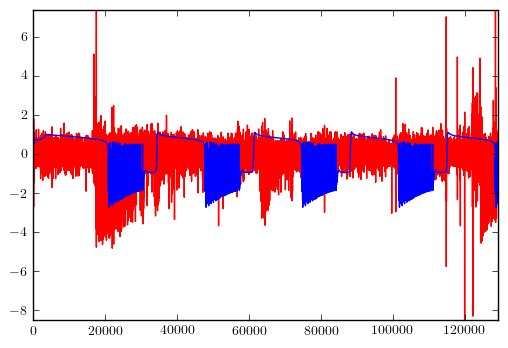

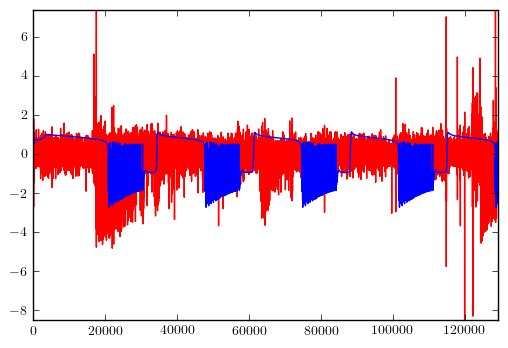

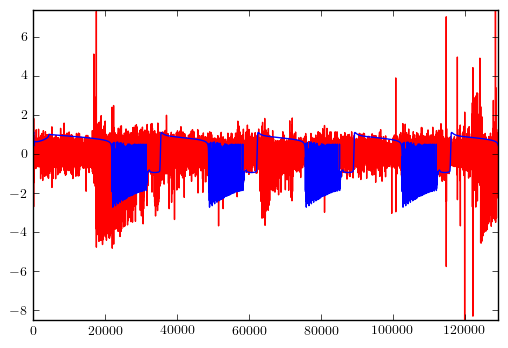

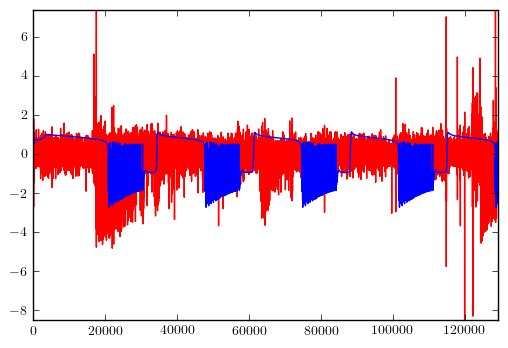

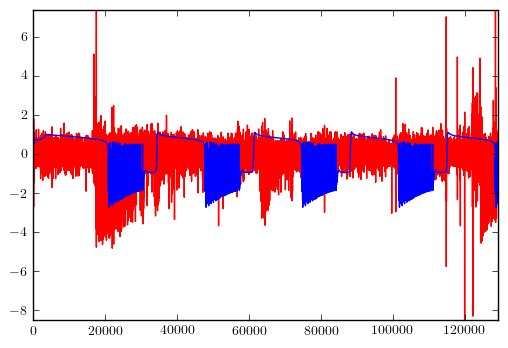

In [166]:
_, hof, log, hst = opt.run(max_ngen=10)

In [87]:
?bpop.optimisations.DEAPOptimisation

In [273]:
if 1:
    epileptor_evaluator = reload(epileptor_evaluator)
    epileptor_util = reload(epileptor_util)
hof = []
for i in range(2):
    evaluator = epileptor_evaluator.Epileptor_Evaluator(plot=False,
                                                        total_time=2500,
                                                        dt_sample=0.1)
    opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=5,                                                                                                                                            
                                          eta=20, mutpb=0.3, cxpb=0.7, seed=i)
    final_pop, hof_temp, log, hst = opt.run(max_ngen=5)
#     print(evaluator.get_param_dict(hof_temp[0])['x0'])
    hof.append([evaluator.get_param_dict(hof_temp[n]) for n in range(3)])
# print(best_x0)

In [274]:
print('Done!')

Done!


In [267]:
best_ind = hof_temp[0]
best_ind

[-3.607475628755699, 3.8516826743636745, 1262.2533813450266]

In [272]:
hst.genealogy_tree

{1: (),
 2: (),
 3: (),
 4: (1, 2, 3, 1, 2, 3),
 5: (1, 2, 3, 1, 2, 3),
 6: (1, 2, 3, 1, 2, 3),
 7: (1, 2, 3, 1, 2, 3),
 8: (1, 2, 3, 1, 2, 3),
 9: (1, 2, 3, 1, 2, 3),
 10: (9, 5, 9, 9, 5, 9),
 11: (9, 5, 9, 9, 5, 9),
 12: (9, 5, 9, 9, 5, 9),
 13: (9, 5, 9, 9, 5, 9),
 14: (9, 5, 9, 9, 5, 9),
 15: (9, 5, 9, 9, 5, 9)}

In [226]:
log

[{'avg': 4.7505350365589072,
  'gen': 1,
  'max': 5.6589464284045627,
  'min': 3.9697902258776478,
  'nevals': 3,
  'std': 0.69547884515799197},
 {'avg': 4.7575779539251188,
  'gen': 2,
  'max': 5.6589464284045627,
  'min': 3.9697902258776478,
  'nevals': 3,
  'std': 0.68793680370266219},
 {'avg': 3.9736792327049457,
  'gen': 3,
  'max': 3.9846395814360394,
  'min': 3.9668785717976824,
  'nevals': 2,
  'std': 0.0066847014272628869}]

In [188]:
hst.genealogy_history[1]

[1.1105462881262014, 5.03181761176121, 2682.28632332338]

array([[ 0.07478365,  0.13377201,  0.17401978, ...,  0.75975338,
         0.75971132,  0.75971132]])

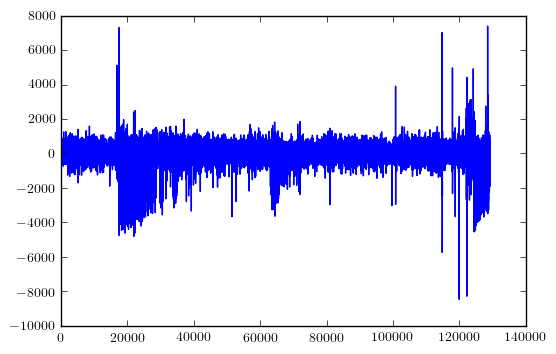

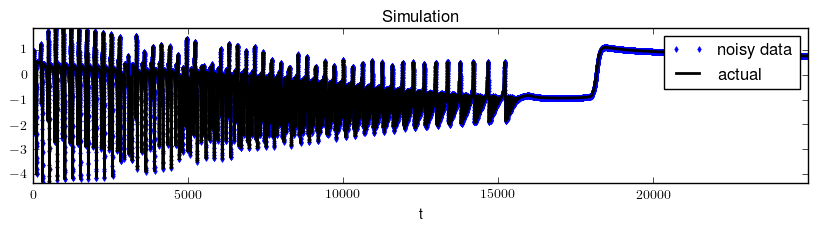

In [70]:
plt.plot(evaluator.target)
sim = epileptor_util.epileptor_model(params=evaluator.get_param_dict(hof_temp[0]))
sim.generate_simulation()

In [42]:
best_ind_dict = evaluator.get_param_dict(hof[0])
best_ind_dict

{'Irest1': 3.1,
 'Irest2': 0.45,
 'g_init': 0.0,
 'gamma': 0.01,
 'noise_ensemble1': 0.0,
 'noise_ensemble2': 0.0,
 'observation_sigmas': 0.0,
 'tau0': 2857.0,
 'tau1': 1.0,
 'tau2': 10.0,
 'x0': -1.6410336857404364,
 'x1_init': 0.0,
 'x2_init': 0.0,
 'y0': 1.0,
 'y1_init': -5.0,
 'y2_init': 0.0,
 'z_init': 3.0}

In [19]:
good_solutions = [evaluator.get_param_dict(ind) for ind in hst.genealogy_history.itervalues() 
                  if np.all(np.array(ind.fitness.values) < 1)]

In [29]:
evaluator.

4950

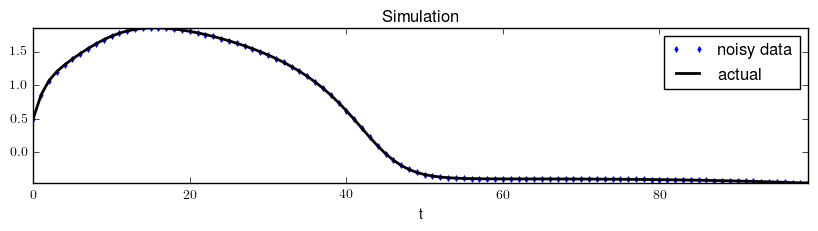

In [20]:
best = epileptor_util.epileptor_model(best_ind_dict).generate_simulation(plot=True)

In [ ]:
# protocols, sg, _, stderr = epileptor_util.load_protocols()
# dt = np.array([float(p.prot_id[:3]) for p in protocols])

In [ ]:
run_fit.plot_dt_scan(best_ind_dict, good_solutions, dt, sg, stderr)

In [ ]:
run_fit.plot_calcium_transients(protocols, best_ind_dict)

In [ ]:
run_fit.plot_log(log)

In [35]:
a = []
not a

True

In [1]:
import pyedf

ImportError: No module named pyedf

In [2]:
f = file('epileptor_util.py')

In [3]:
data = f.read()

In [1]:
import pyedflib

In [17]:
from pyedflib import EdfReader

In [ ]:
f = file('/Users/emilyschlafly/BU/Kramer_rotation/ieeg_data/I002_A0003_D010/outputEdf_EDF/outputEdf_0.edf')

In [3]:
f = pyedflib.EdfReader('/Users/emilyschlafly/BU/Kramer_rotation/ieeg_data/I002_A0003_D010/outputEdf_EDF/outputEdf_0.edf')

In [5]:
data = f.readSignal(0)

In [30]:
data_subsample = data[::25]
data_subsample.shape

(129250,)

In [28]:
print(f.getSampleFrequency(0))
print(f.getNSamples())
print(f.getFileDuration())

250.0
[3231250]
12925


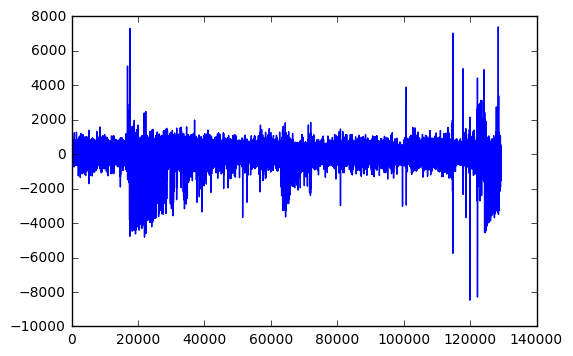

In [33]:
import matplotlib.pyplot as plt
k = 10000
plt.plot(data_subsample)
plt.show()

In [55]:
if 1:
    epileptor_evaluator = reload(epileptor_evaluator)
    epileptor_util = reload(epileptor_util)
evaluator = epileptor_evaluator.Epileptor_Evaluator(plot=True, total_time=[], dt_sample=.1)

('total_time:', 3231250, 'dt_sample:', 0.1, 'tt/dt:', 32312500)


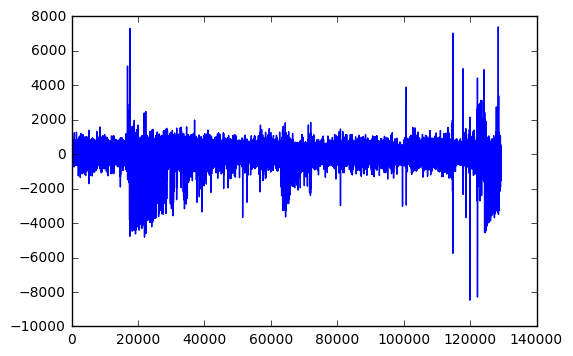

In [56]:
plt.plot(evaluator.target)
plt.show()

In [60]:
opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=1,                                                                                                                                            
                                          eta=20, mutpb=0.3, cxpb=0.7)

In [62]:
_, hof, log, hst = opt.run(max_ngen=1)

In [63]:
hof

In [ ]:
best_x0 = []
for i in range(1):
    evaluator = epileptor_evaluator.Epileptor_Evaluator()
    opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=5,                                                                                                                                            
                                          eta=20, mutpb=0.3, cxpb=0.7)
    _, hof_temp, _, _ = opt.run(max_ngen=5)
#     print(evaluator.get_param_dict(hof_temp[0])['x0'])
    best_x0.append([evaluator.get_param_dict(hof_temp[n])['x0'] for n in range(3)])
# print(best_x0)